In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('https://storage.googleapis.com/data-ia/data.csv')
data.drop(['ID'], axis=1, inplace=True)
target = 'Status'

In [4]:
data.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

### Categoricos booleanos

In [6]:
data['loan_limit'] = data['loan_limit'].map({ 'cf': 1, 'ncf': 0, 'nan': 0 })


In [7]:
data['approv_in_adv'] = data['approv_in_adv'].map({ 'nopre': 0, 'pre': 1, 'nan': 0 })

In [8]:
data['Credit_Worthiness'] = data['Credit_Worthiness'].map({ 'l1': 0, 'l2': 1 })

In [9]:
data['open_credit'] = data['open_credit'].map({ 'nopc': 0, 'opc': 1 })

In [10]:
data['Neg_ammortization'] = data['Neg_ammortization'].map({ 'not_neg': 0, 'neg_amm': 1, 'nan': 0 })

In [11]:
data['interest_only'] = data['interest_only'].map({ 'not_int': 0, 'int_only': 1 })

In [12]:
data['lump_sum_payment'] = data['lump_sum_payment'].map({ 'not_lpsm': 0, 'lpsm': 1 })

In [13]:
data['construction_type'] = data['construction_type'].map({ 'sb': 0, 'mh': 1 })

In [14]:
data['Secured_by'] = data['Secured_by'].map({ 'land': 0, 'home': 1 })

In [15]:
data['business_or_commercial'] = data['business_or_commercial'].map({ 'nob/c': 0, 'b/c': 1 })

### Categoricos não booleanos

In [16]:
# data['Gender'] = data['Gender'].map({ 'Male': 1, 'Female': 2, 'Joint': 3, 'Sex Not Available': 4 })
data['GenderMale'] = data['Gender'].map({ 'Male': 1, 'Female': 0, 'Joint': 0, 'Sex Not Available': 0 })
data['GenderFemale'] = data['Gender'].map({ 'Male': 0, 'Female': 1, 'Joint': 0, 'Sex Not Available': 0 })
data['GenderJoint'] = data['Gender'].map({ 'Male': 0, 'Female': 0, 'Joint': 1, 'Sex Not Available': 0 })
data.drop(['Gender'], axis=1, inplace=True)

In [17]:
# data['loan_type'] = data['loan_type'].map({ 'type1': 1, 'type2': 2, 'type3': 3 })
data['loan_type1'] = data['loan_type'].map({ 'type1': 1, 'type2': 0, 'type3': 0 })
data['loan_type2'] = data['loan_type'].map({ 'type1': 0, 'type2': 1, 'type3': 0 })
data['loan_type3'] = data['loan_type'].map({ 'type1': 0, 'type2': 0, 'type3': 1 })
data.drop(['loan_type'], axis=1, inplace=True)

In [18]:
# data['loan_purpose'] = data['loan_purpose'].map({ 'p1': 1, 'p2': 2, 'p3': 3, 'p4': 4, 'nan': 0 })

data['loan_purpose_p1'] = data['loan_purpose'].map({ 'p1': 1, 'p2': 0, 'p3': 0, 'p4': 0, 'nan': 0 })
data['loan_purpose_p2'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 1, 'p3': 0, 'p4': 0, 'nan': 0 })
data['loan_purpose_p3'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 0, 'p3': 1, 'p4': 0, 'nan': 0 })
data['loan_purpose_p4'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 0, 'p3': 0, 'p4': 1, 'nan': 0 })
data.drop(['loan_purpose'], axis=1, inplace=True)

In [19]:
# data['occupancy_type'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 1, 'sr': 2 })

data['occupancy_type_pr'] = data['occupancy_type'].map({ 'pr': 1, 'ir': 0, 'sr': 0 })
data['occupancy_type_ir'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 1, 'sr': 0 })
data['occupancy_type_sr'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 0, 'sr': 1 })
data.drop(['occupancy_type'], axis=1, inplace=True)

In [20]:
data['total_units'] = data['total_units'].map({ '1U': 1, '2U': 2, '3U': 3, '4U': 4 })

### Numericas

In [29]:
# Dropando porque só tem um valor
data.drop(['year'], axis=1, inplace=True)

KeyError: "['year'] not found in axis"

In [35]:
# Dropando por não ter correlação
data.drop(['Interest_rate_spread'], axis=1, inplace=True)

### Prepare

In [25]:
correlation = data.corr(numeric_only = True, method='pearson').round(2)
correlation['Status']

year                       NaN
loan_limit               -0.05
approv_in_adv            -0.04
Credit_Worthiness         0.03
open_credit              -0.01
business_or_commercial    0.09
loan_amount              -0.04
rate_of_interest          0.02
Interest_rate_spread       NaN
Upfront_charges          -0.02
term                     -0.00
Neg_ammortization         0.16
interest_only             0.01
lump_sum_payment          0.19
property_value           -0.05
construction_type         0.03
Secured_by               -0.03
total_units               0.02
income                   -0.07
Credit_Score              0.00
LTV                       0.04
Status                    1.00
dtir1                     0.08
GenderMale                0.02
GenderFemale              0.01
GenderJoint              -0.08
loan_type1               -0.08
loan_type2                0.09
loan_type3                0.00
loan_purpose_p1           0.02
loan_purpose_p2           0.03
loan_purpose_p3           0.01
loan_pur

<AxesSubplot: >

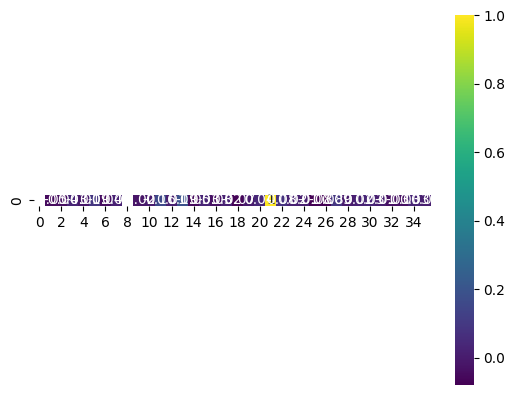